# ML project

In this project we will explore a dataset with the following columns:
- **RowNumber**—corresponds to the record number.
- **CustomerId**—contains the identification number of the client.
- **Surname**—the surname of the customer.
- **CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to 
leave the bank.
- **Geography**—the customer’s location.
- **Gender**—the customer's gender.
- **Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts**—refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember**—active customers are less likely to leave the bank.
- **EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited**—whether or not the customer left the bank.
- **Complain**—customer has complaint or not.
- **Satisfaction Score**—Score provided by the customer for their complaint resolution.
- **Card Type**—type of card hold by the customer.
- **Points Earned**—the points earned by the customer for using credit card.


The idea for this project is a pedagogical one: try to explore as many techniques as you can. I understand you have jobs and families and things to do, so I will focus more on the rigor rather than the quantity. 

## Minimum requirements:

1. Explore the data statistics as you have learned in our and previous modules.
2. Validation techniques: train/validation/test split is the minimum and most common one, but feel free to explore others.
3. Choose a classification model and train it.
4. Check the metrics.


## Optional things to learn more (ask me if you had any questions):

1. Outlier detection
2. Feature selection and dimensionality reduction techniques
3. Imbalanced dataset techniques
4. Hyperparameter tunning
5. Statistical tests

### NOTE: it is important to comment with text *every step* to show that you understand what you are doing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Import the Customer-Churn-Records.csv file and HAVE FUN
df = pd.read_csv('Customer-Churn-Records.csv')

## 1. Explore the data statistics as you have learned in our and previous modules.

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### divisao das colunas em categoricas e numericas

In [6]:
#df_numeric contem apenas as colunas numericas do dataframe 
df_numeric = df.select_dtypes(include = ['float64', 'int64'])
df_numeric

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,1,300
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,3,564
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339


In [7]:
df_numeric.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


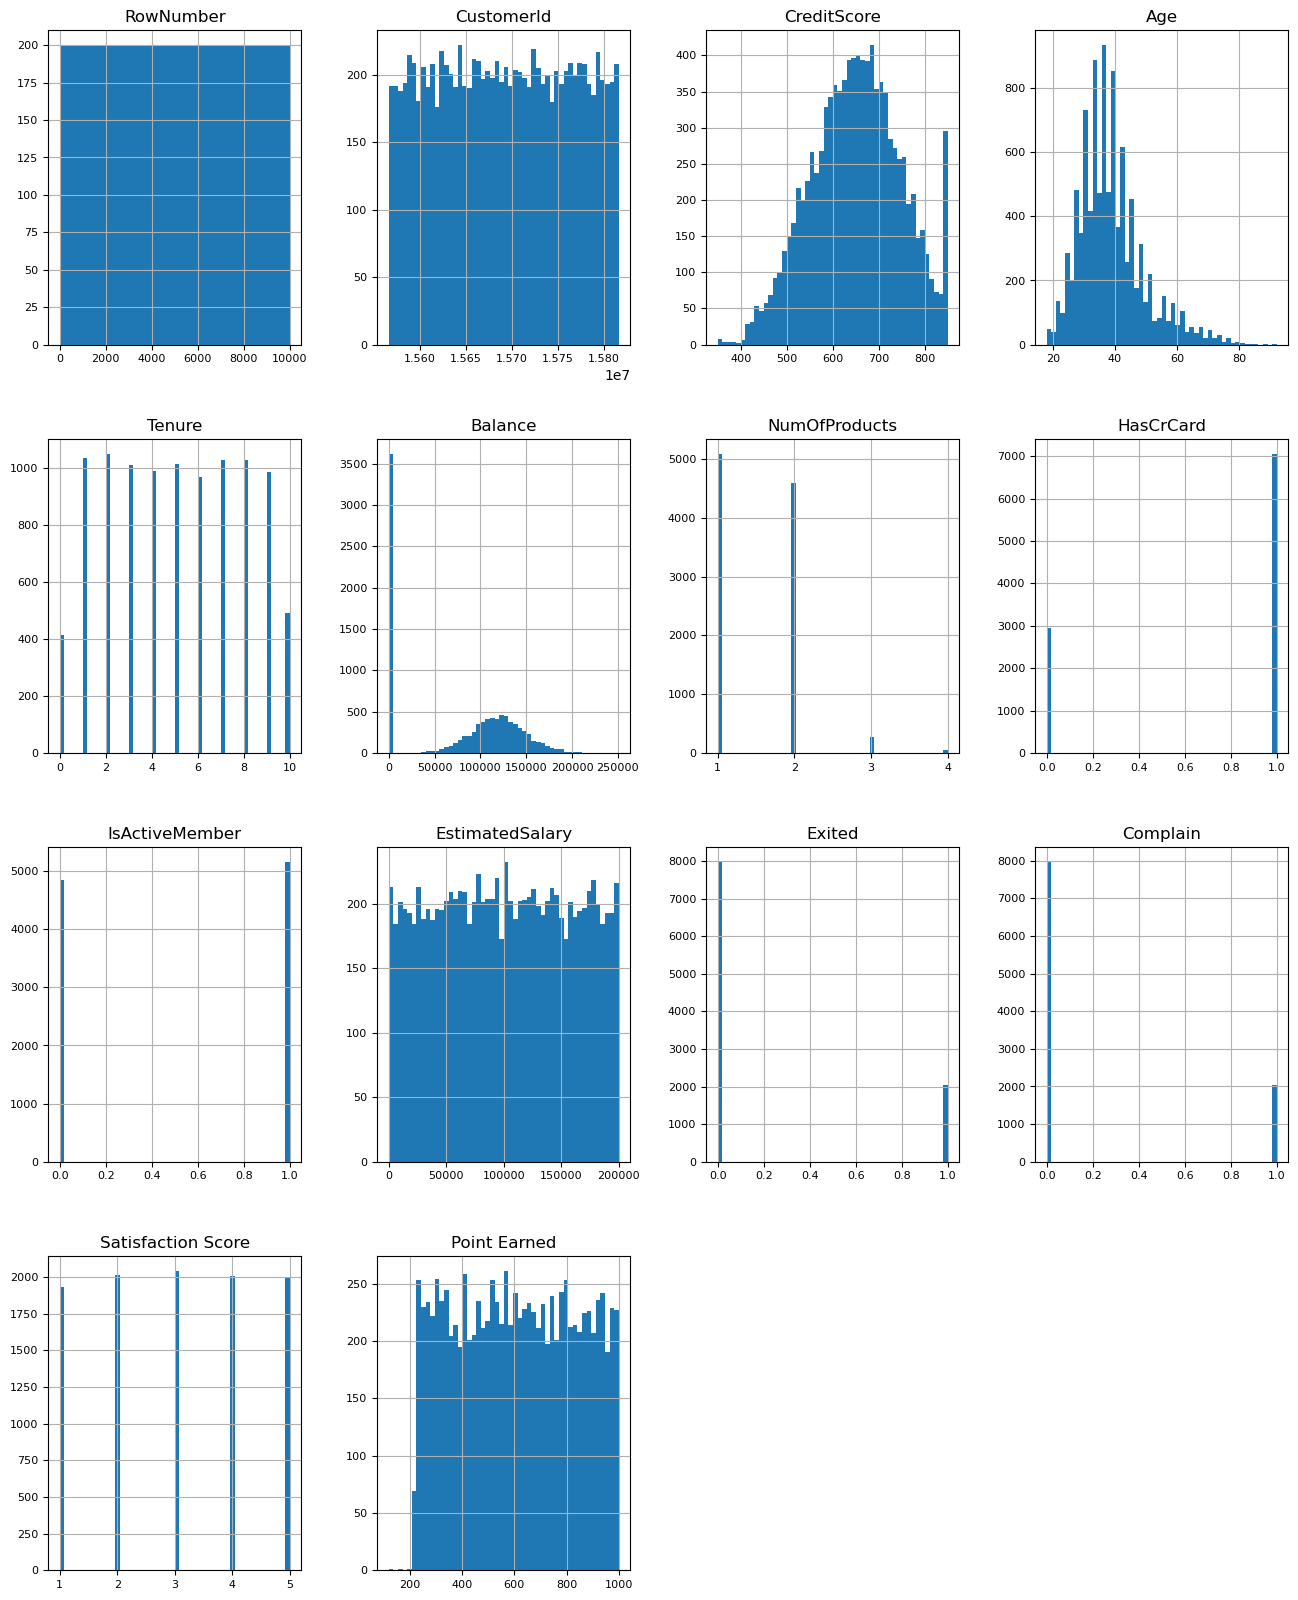

In [8]:
#visualizacao inicial das colunas numericas
df_numeric.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [9]:
#df_object contem apenas as colunas do typo object do dataframe
df_object = df.select_dtypes(include='object')
df_object

,Surname,Geography,Gender,Card Type
0,Hargrave,France,Female,DIAMOND
1,Hill,Spain,Female,DIAMOND
2,Onio,France,Female,DIAMOND
3,Boni,France,Female,GOLD
4,Mitchell,Spain,Female,GOLD
...,...,...,...,...
9995,Obijiaku,France,Male,DIAMOND
9996,Johnstone,France,Male,PLATINUM
9997,Liu,France,Female,SILVER
9998,Sabbatini,Germany,Male,GOLD


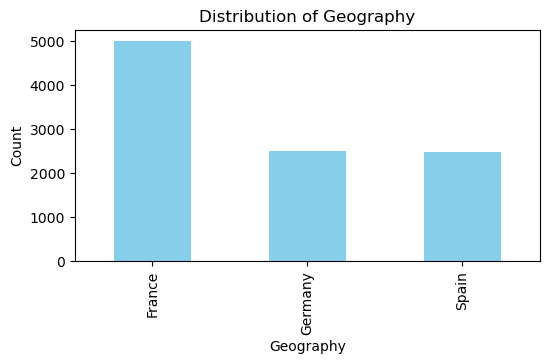

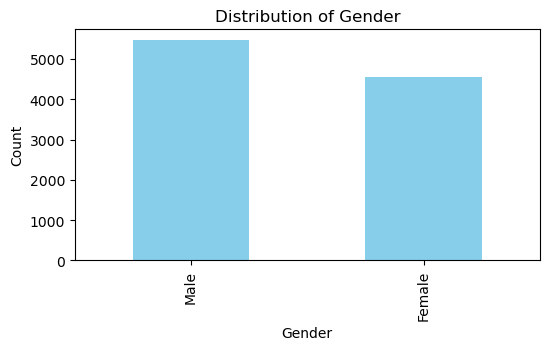

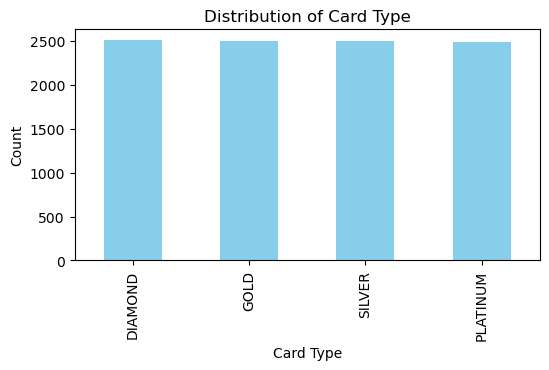

In [10]:
#visualizacao inicial das colunas categoricas
for column in df_object.drop("Surname", axis=1):
    plt.figure(figsize=(6, 3))
    df_object[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [11]:
#por a coluna rownumber como index e eliminaçao de colunas 
df = df.set_index('RowNumber')

columns_to_drop = ['CustomerId', 'Surname']
df = df.drop(columns=columns_to_drop)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
RowNumber,,,,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564


## criaçao de realtorio html sobre o dataframe

In [12]:
from ydata_profiling import ProfileReport

# Crie um relatório de perfil
profile = ProfileReport(df)

# Salve o relatório em um arquivo HTML
profile.to_file("relatorio_de_perfil.html")

C:\Users\ANTONIO\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Outliers

In [13]:
# remoçao de linhas incoerentes do dataset
#na observaçao das imagens sobre as variaveis, conseguimos perceber que a variavel Balance tem muitos valores 0
#fazendo uma pequena condiçao, conseguimos ver que temos mebros activos no banco com salario superior a 0 
#e que ja tao no banco á mais de 1 ano, com  Balance==0
#decidimos remover essas lihas incoerentes do dataset antes mesmo de aplicar um modelo de detençao de outliers

condition = (df['Balance'] == 0) & (df['Tenure'] != 0) & (df['IsActiveMember'] == 1) & (df['EstimatedSalary'] != 0)
df = df[~condition]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
RowNumber,,,,,,,,,,,,,,,
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
6,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0,4,PLATINUM,311
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771


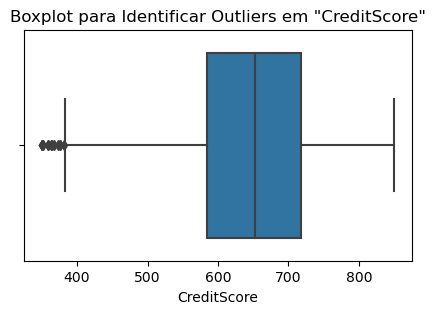

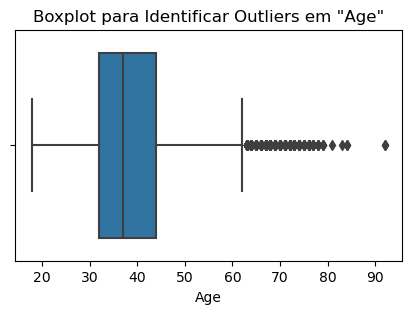

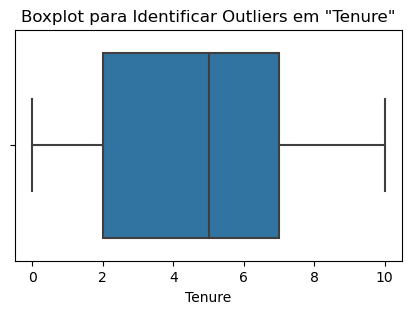

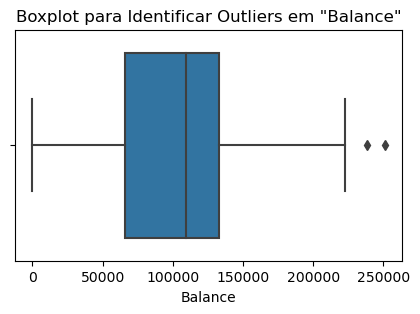

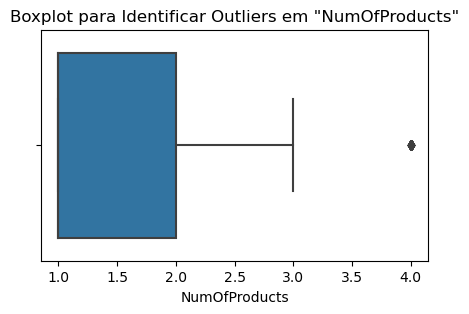

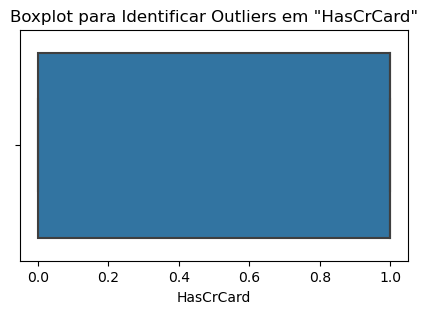

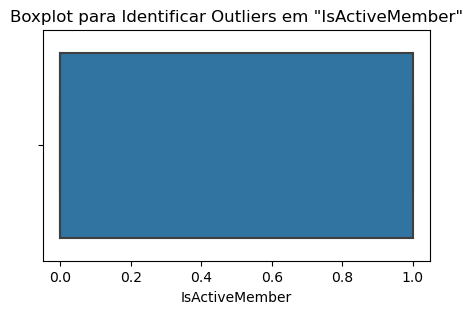

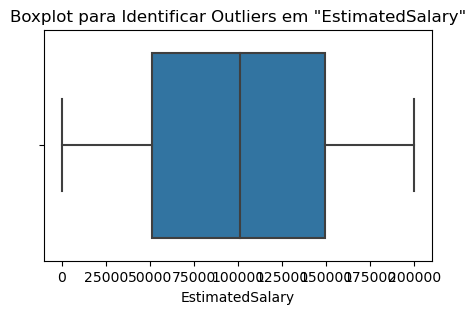

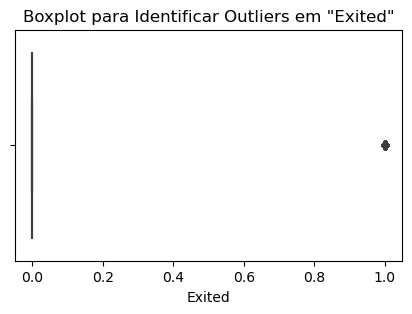

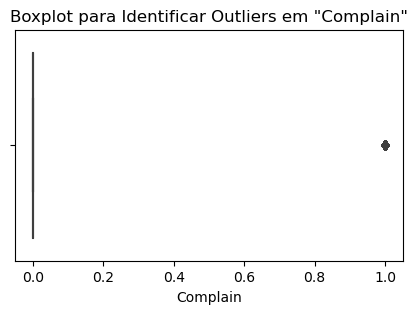

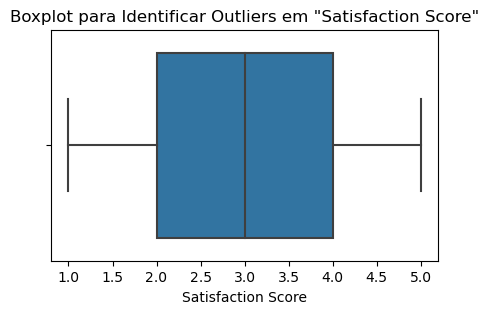

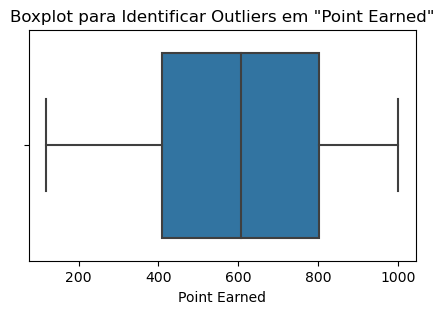

In [14]:
# Cria boxplots para as variáveis 
# Cria um relatório de perfil
for column in df.select_dtypes(include = ['float64', 'int64']):
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=column, data=df.select_dtypes(include = ['float64', 'int64']))
    plt.title(f'Boxplot para Identificar Outliers em "{column}"')
    plt.show()


In [15]:
from sklearn.ensemble import IsolationForest

# Cria um modelo Isolation Forest
isolation_forest_model = IsolationForest(contamination=0.01)  # Ajuste o parâmetro de contaminação conforme necessário

# Treina o modelo e prediz os outliers
df['outlier'] = isolation_forest_model.fit_predict(df.select_dtypes(include = ['float64', 'int64']).drop('Exited', axis=1))

# Exibe os outliers
print("Outliers identificados:")
print(df[df['outlier'] == -1])

Outliers identificados:
           CreditScore Geography  Gender  Age  Tenure    Balance  \
RowNumber                                                          
8                  376   Germany  Female   29       4  115046.74   
150                416    France    Male   32       0       0.00   
253                681    France  Female   79       0       0.00   
556                590     Spain  Female   51       3  154962.99   
567                438     Spain  Female   54       2       0.00   
...                ...       ...     ...  ...     ...        ...   
9371               561    France    Male   43       4       0.00   
9392               846     Spain    Male   61       0       0.00   
9439               701   Germany    Male   63       3  120916.52   
9441               593     Spain    Male   27      10       0.00   
9748               610   Germany  Female   69       5   86038.21   

           NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
RowNumber  

C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_11844\2473639893.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier'] = isolation_forest_model.fit_predict(df.select_dtypes(include = ['float64', 'int64']).drop('Exited', axis=1))


In [16]:
# Separa os dados em conjuntos com e sem outliers
df_outliers = df[df['outlier'] == -1]
df_without_outliers = df[df['outlier'] != -1]

In [17]:
df_without_outliers

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,outlier
RowNumber,,,,,,,,,,,,,,,,
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,1
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,1
6,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0,4,PLATINUM,311,1
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,1
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,1


## Feature selection 

In [18]:
corr_matrix = df_without_outliers.select_dtypes(include = ['float64', 'int64']).corr(method='spearman')
corr_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CreditScore,1.000000,-0.012655,0.002660,0.004267,0.008676,-0.010477,0.030223,0.000933,-0.018990,-0.019570,-0.008473,0.002724
Age,-0.012655,1.000000,-0.003964,0.044250,-0.075351,-0.011940,0.047680,-0.007496,0.349686,0.347832,0.006367,0.002319
Tenure,0.002660,-0.003964,1.000000,0.009863,0.000618,0.027213,-0.055466,0.016372,-0.007438,-0.007130,0.001172,-0.012121
Balance,0.004267,0.044250,0.009863,1.000000,-0.230027,0.001692,0.282358,0.004885,0.048200,0.048917,-0.005791,0.010080
NumOfProducts,0.008676,-0.075351,0.000618,-0.230027,1.000000,0.006610,-0.125375,0.017889,-0.111281,-0.109545,-0.012506,-0.015362
HasCrCard,-0.010477,-0.011940,0.027213,0.001692,0.006610,1.000000,-0.023234,-0.005898,0.018763,0.018398,0.004238,-0.013281
IsActiveMember,0.030223,0.047680,-0.055466,0.282358,-0.125375,-0.023234,1.000000,-0.006465,-0.118965,-0.117056,0.008621,-0.002315
EstimatedSalary,0.000933,-0.007496,0.016372,0.004885,0.017889,-0.005898,-0.006465,1.000000,0.003823,0.004222,-0.018303,0.008245
Exited,-0.018990,0.349686,-0.007438,0.048200,-0.111281,0.018763,-0.118965,0.003823,1.000000,0.995354,-0.000994,-0.000771
Complain,-0.019570,0.347832,-0.007130,0.048917,-0.109545,0.018398,-0.117056,0.004222,0.995354,1.000000,0.000261,0.000881


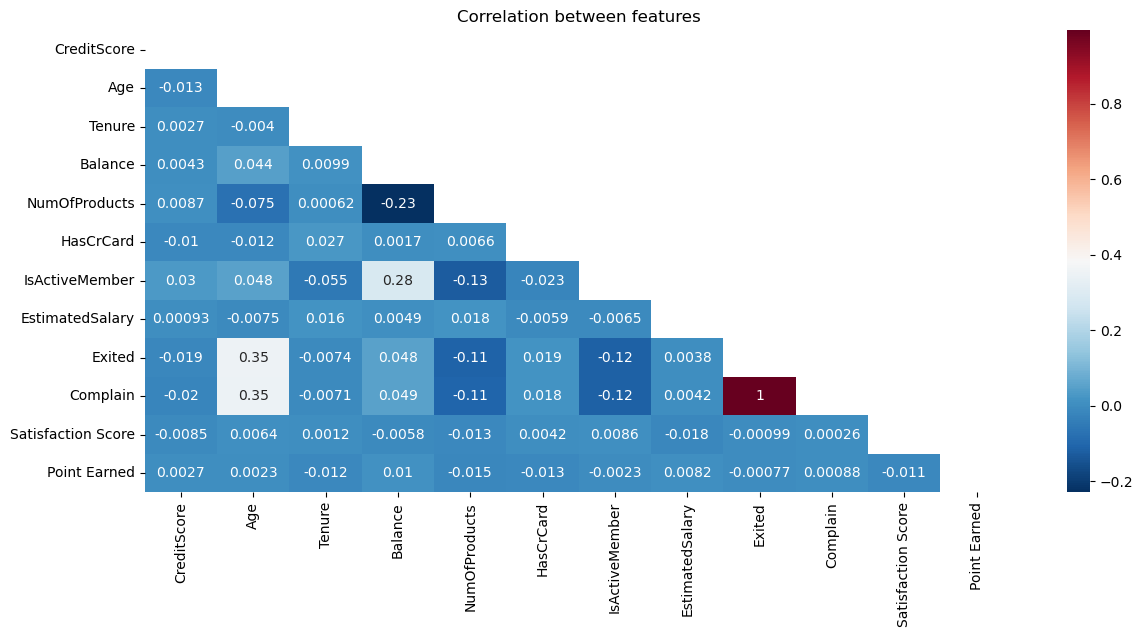

In [19]:
lower_triangle_mask = np.triu(np.ones(corr_matrix.shape)).astype(np.bool_)
cor_mat_lower = corr_matrix.mask(lower_triangle_mask)

plt.figure(figsize = (14,6))  
plt.title("Correlation between features")

sns.heatmap(cor_mat_lower, 
            annot=True,     
            cmap='RdBu_r'); 

In [20]:
df_without_outliers.select_dtypes(include = ['float64', 'int64']).corr()['Exited'].sort_values()

IsActiveMember       -0.118965
NumOfProducts        -0.044287
CreditScore          -0.021116
Tenure               -0.007466
Point Earned         -0.001049
Satisfaction Score   -0.000895
EstimatedSalary       0.003838
HasCrCard             0.018763
Balance               0.055490
Age                   0.318379
Complain              0.995354
Exited                1.000000
Name: Exited, dtype: float64

In [21]:
 from sklearn.feature_selection import mutual_info_classif

numerical = df_without_outliers.select_dtypes(include = ['float64', 'int64']).columns
numerical = numerical.drop('Exited')

In [22]:
mutual_info = mutual_info_classif(
    X=df_without_outliers[numerical].fillna(0)
    y=df_without_outliers['Exited'])

In [23]:
numerical_mutual_info = pd.Series(mutual_info, index=numerical).sort_values()
numerical_mutual_info

Tenure                0.000000
HasCrCard             0.000000
Satisfaction Score    0.000000
Balance               0.000728
Point Earned          0.004909
CreditScore           0.004924
EstimatedSalary       0.005352
IsActiveMember        0.011243
NumOfProducts         0.056155
Age                   0.083032
Complain              0.517699
dtype: float64

In [24]:
categorical = df_without_outliers.select_dtypes(include='object').columns

df_without_outliers[categorical].nunique()

Geography    3
Gender       2
Card Type    4
dtype: int64

In [25]:
dummied_categs = pd.get_dummies(df_without_outliers[categorical])

mi = mutual_info_classif(X=dummied_categs, y=df_without_outliers['Exited'])

In [26]:
categorical_mutual_info = pd.Series(mi, index=dummied_categs.columns).sort_values()
categorical_mutual_info

Geography_Spain       0.000000
Card Type_DIAMOND     0.000000
Card Type_GOLD        0.000000
Card Type_PLATINUM    0.000111
Card Type_SILVER      0.002161
Geography_Germany     0.007049
Gender_Male           0.008983
Gender_Female         0.009129
Geography_France      0.009210
dtype: float64

In [27]:
display(numerical_mutual_info)
display(categorical_mutual_info)

Tenure                0.000000
HasCrCard             0.000000
Satisfaction Score    0.000000
Balance               0.000728
Point Earned          0.004909
CreditScore           0.004924
EstimatedSalary       0.005352
IsActiveMember        0.011243
NumOfProducts         0.056155
Age                   0.083032
Complain              0.517699
dtype: float64

Geography_Spain       0.000000
Card Type_DIAMOND     0.000000
Card Type_GOLD        0.000000
Card Type_PLATINUM    0.000111
Card Type_SILVER      0.002161
Geography_Germany     0.007049
Gender_Male           0.008983
Gender_Female         0.009129
Geography_France      0.009210
dtype: float64

In [28]:
# minha escolha das features 
features = [
    'Complain', 
    'Age',
    'NumOfProducts',
    'IsActiveMember',
    'Geography',
    'Gender'
]

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = pd.get_dummies(df_without_outliers[features]).fillna(0)
y = df_without_outliers['Exited']

In [30]:
dt = DecisionTreeClassifier(max_depth=2, 
                            min_samples_split=.05  
                           )
dt.fit(X, y);

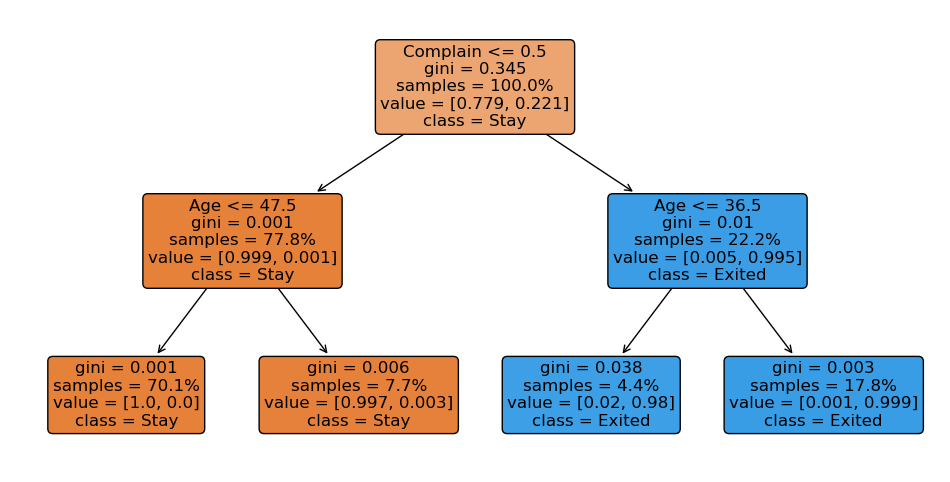

In [31]:
plt.subplots(figsize=(12, 6))   

my_plot = plot_tree(
    decision_tree=dt,
    feature_names=X.columns,           
    class_names=['Stay', 'Exited'],  
    label='all',        
    filled=True,         
    impurity=True,      
    proportion=True,      
    rounded=True,       
    fontsize=12);

## Validation techniques, choose a classification model and train it, deal with Imbalanced dataset and check the metrics

In [32]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    recall_score, 
    f1_score, 
    roc_auc_score, 
    roc_curve, 
    confusion_matrix, 
    precision_score, 
    recall_score,
)

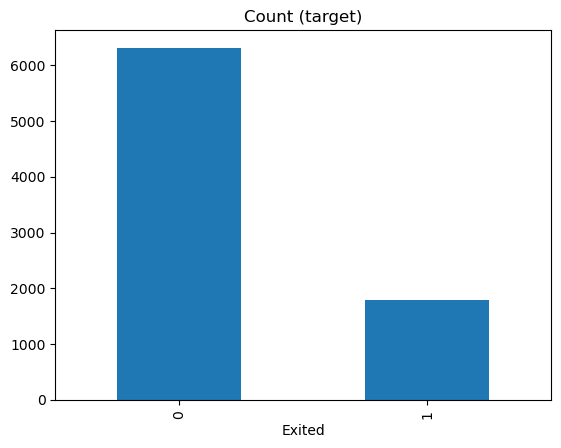

In [33]:
df_without_outliers['Exited'].value_counts().plot(kind='bar', title='Count (target)');

In [34]:
#cria  train, Validation e test Dataset

X = pd.get_dummies(df_without_outliers[features])
y = df_without_outliers['Exited']

X_left, X_test, y_left, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_left, y_left, test_size=0.2/0.8, random_state=1234, stratify=y_left
)

# cria StandardScaler instance
scaler = StandardScaler()

# Fit e transform nos dados de treino, validaçao e teste
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

for y_tmp, l in zip([y_train, y_val, y_test], ["train", "validation", "test"]):
    len_y = y_tmp.size
    ones_y = y_tmp.loc[y_tmp == 1].size
    print(f"Size of {l}: {len_y}")
    print(f"Number of class 1 examples in {l}: {ones_y} ({np.round(100.0 * ones_y/len_y, 2)} %)")

Size of train: 4865
Number of class 1 examples in train: 1076 (22.12 %)
Size of validation: 1622
Number of class 1 examples in validation: 359 (22.13 %)
Size of test: 1622
Number of class 1 examples in test: 359 (22.13 %)


In [35]:
# Testar varios modelos, para comparar performances
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train_normalized, y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.998149 (0.002512)
LDA: 0.998149 (0.002512)
KNN: 0.998149 (0.002512)
CART: 0.995888 (0.002435)
NB: 0.998149 (0.002512)
SVM: 0.998149 (0.002512)


In [36]:
# Logistic Regression
logistic_model = LogisticRegression(solver='liblinear', multi_class='ovr')
logistic_model.fit(X_train_normalized, y_train)
pred_logistic = logistic_model.predict(X_val_normalized)

accuracy_logistic = accuracy_score(y_val, pred_logistic)
print("Logistic Regression Accuracy: %.2f%%" % (accuracy_logistic * 100.0))

# Linear Discriminant Analysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_normalized, y_train)
pred_lda = lda_model.predict(X_val_normalized)

accuracy_lda = accuracy_score(y_val, pred_lda)
print("Linear Discriminant Analysis Accuracy: %.2f%%" % (accuracy_lda * 100.0))


Logistic Regression Accuracy: 99.82%
Linear Discriminant Analysis Accuracy: 99.82%


Logistic Regression Metrics:
Majority class (label 0)
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
--------------
Minority class (label 1)
Precision: 0.99
Recall: 1.00
F1-Score: 1.00


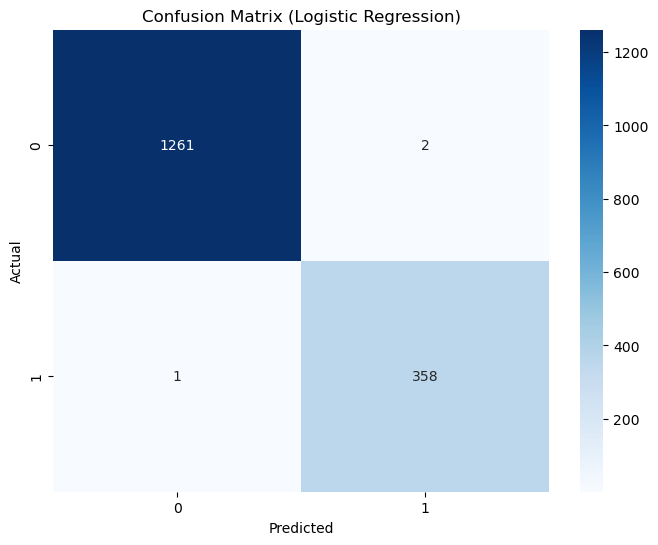

Linear Discriminant Analysis Metrics:
Majority class (label 0)
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
--------------
Minority class (label 1)
Precision: 0.99
Recall: 1.00
F1-Score: 1.00


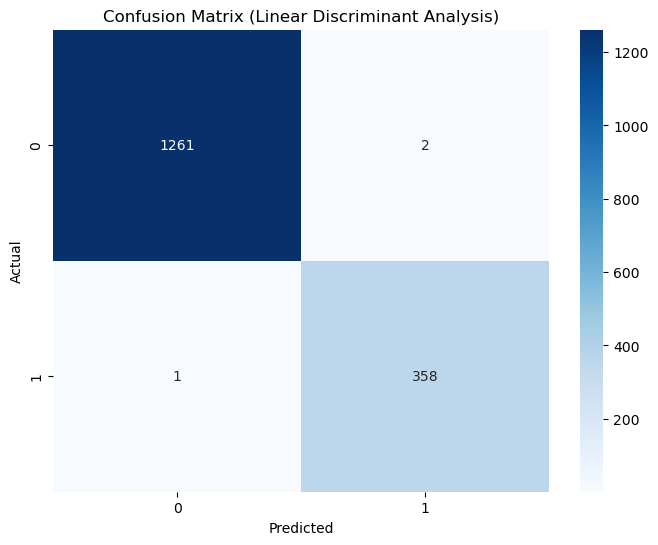

In [37]:
# Evaluate Logistic Regression
print("Logistic Regression Metrics:")
print("Majority class (label 0)")
print("Precision: %.2f" % precision_score(y_val, pred_logistic, pos_label=0))
print("Recall: %.2f" % recall_score(y_val, pred_logistic, pos_label=0))
print("F1-Score: %.2f" % f1_score(y_val, pred_logistic, pos_label=0))
print("--------------")
print("Minority class (label 1)")
print("Precision: %.2f" % precision_score(y_val, pred_logistic, pos_label=1))
print("Recall: %.2f" % recall_score(y_val, pred_logistic, pos_label=1))
print("F1-Score: %.2f" % f1_score(y_val, pred_logistic, pos_label=1))

# Confusion Matrix for Logistic Regression
cm_logistic = confusion_matrix(y_val, pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluate Linear Discriminant Analysis
print("Linear Discriminant Analysis Metrics:")
print("Majority class (label 0)")
print("Precision: %.2f" % precision_score(y_val, pred_lda, pos_label=0))
print("Recall: %.2f" % recall_score(y_val, pred_lda, pos_label=0))
print("F1-Score: %.2f" % f1_score(y_val, pred_lda, pos_label=0))
print("--------------")
print("Minority class (label 1)")
print("Precision: %.2f" % precision_score(y_val, pred_lda, pos_label=1))
print("Recall: %.2f" % recall_score(y_val, pred_lda, pos_label=1))
print("F1-Score: %.2f" % f1_score(y_val, pred_lda, pos_label=1))

# Confusion Matrix for Linear Discriminant Analysis
cm_lda = confusion_matrix(y_val, pred_lda)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix (Linear Discriminant Analysis)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

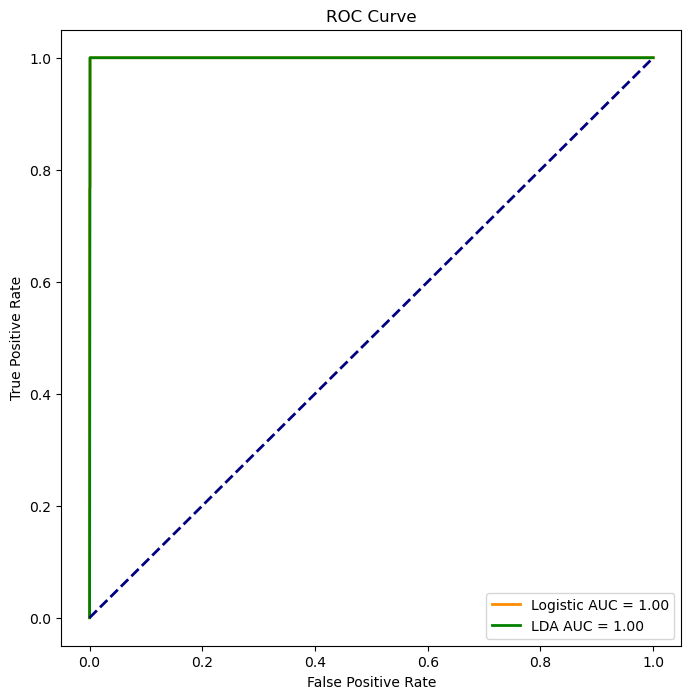

In [38]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression
y_prob_logistic = logistic_model.predict_proba(X_test_normalized)[:, 1]

# Linear Discriminant Analysis
y_prob_lda = lda_model.predict_proba(X_test_normalized)[:, 1]


# Plot ROC curve for Logistic Regression
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Plot ROC curve for Linear Discriminant Analysis
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

# Plot the ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label=f'Logistic AUC = {roc_auc_logistic:.2f}')
plt.plot(fpr_lda, tpr_lda, color='green', lw=2, label=f'LDA AUC = {roc_auc_lda:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()